In [177]:
from pylab import mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
dataset = pd.read_csv("./breast cancer.csv")
X=dataset.iloc[:,[2,3,4,6,8,10,11,12,13,14]].values
y = dataset.iloc[:,1].values

In [181]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [183]:
from sklearn.svm import SVC
# 创建SVM分类器实例
classifier = SVC()
# 拟合模型
classifier.fit(X_train, y_train)



SVC()

# 朴素交叉验证

In [184]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

# 定义交叉验证折叠数
folds = 3
# 创建交叉验证对象
kf = KFold(n_splits=folds, shuffle=True, random_state=0)
# 进行交叉验证并计算召回率
recalls = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=kf, scoring='recall_macro')
# 计算平均召回率和标准差
average_recall = recalls.mean()
standard_deviation_recall = recalls.std()

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("Average Recall: {:.2f} %".format(average_recall*100))
print("Standard Deviation of Recall: {:.2f} %".format(standard_deviation_recall*100))

Accuracy: 90.23 %
Standard Deviation: 29.68 %
Average Recall: 86.97 %
Standard Deviation of Recall: 0.94 %


# 保留交叉验证

In [185]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
# 创建交叉验证对象
loocv = LeaveOneOut()
# 进行交叉验证
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=loocv, scoring='accuracy')
recalls = []
for train_index, test_index in loocv.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    # 评估模型
    y_pred = classifier.predict(X_test_fold)
    # 计算召回率
    if len(y_test_fold[y_test_fold == 1]) > 0:  # 确保有正类样本
        recall = recall_score(y_test_fold, y_pred)
        recalls.append(recall)
    else:
        recalls.append(1)  # 如果没有正类样本，设置召回率为1
# 计算平均召回率和标准差
average_recall = sum(recalls) / len(recalls) if recalls else 0
standard_deviation_recall = np.std(recalls) if recalls else 0

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation of Accuracy: {:.2f} %".format(accuracies.std()*100))
print("Recall: {:.2f} %".format(average_recall*100))
print("Standard Deviation of Recall: {:.2f} %".format(standard_deviation_recall*100))

Accuracy: 90.23 %
Standard Deviation of Accuracy: 29.68 %
Recall: 100.00 %
Standard Deviation of Recall: 0.00 %


# 朴素交叉验证柱形图

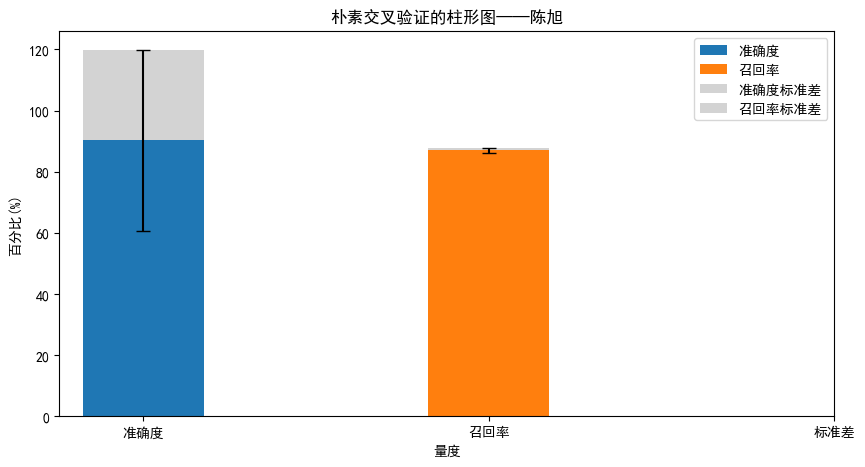

In [186]:
import matplotlib.pyplot as plt

# 假设您已经有了这些变量
accuracy = 90.23
std_dev_accuracy = 29.68
recall = 86.97
std_dev_recall = 0.94

# 设置图表的宽度、高度和标题
width = 0.35
height = 0.8
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
ax.set_title('朴素交叉验证的柱形图——陈旭')

# 创建准确度的条形图
ax.bar(0, accuracy, width, label='准确度', yerr=std_dev_accuracy, capsize=5)

# 创建召回率的条形图
ax.bar(1, recall, width, label='召回率', yerr=std_dev_recall, capsize=5)

# 创建准确度标准差的条形图
ax.bar(0, std_dev_accuracy, width, bottom=accuracy, label='准确度标准差', color='lightgray', yerr=None, capsize=5)

# 创建召回率标准差的条形图
ax.bar(1, std_dev_recall, width, bottom=recall, label='召回率标准差', color='lightgray', yerr=None, capsize=5)

# 设置条形图的标签和图例
ax.set_xlabel('量度')
ax.set_ylabel('百分比(%)')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['准确度', '召回率', '标准差'])
ax.legend()

# 显示图表
plt.show()

# 保留交叉验证柱形图

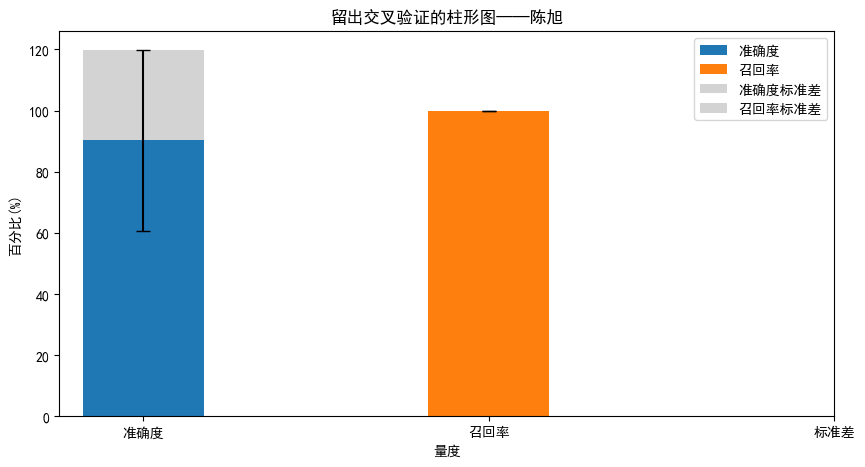

In [187]:
import matplotlib.pyplot as plt

# 假设您已经有了这些变量
accuracy = 90.23
std_dev_accuracy = 29.68
recall = 100.00
std_dev_recall = 0.00

# 设置图表的宽度、高度和标题
width = 0.35
height = 0.8
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
ax.set_title('留出交叉验证的柱形图——陈旭')

# 创建准确度的条形图
ax.bar(0, accuracy, width, label='准确度', yerr=std_dev_accuracy, capsize=5)

# 创建召回率的条形图
ax.bar(1, recall, width, label='召回率', yerr=std_dev_recall, capsize=5)

# 创建准确度标准差的条形图
ax.bar(0, std_dev_accuracy, width, bottom=accuracy, label='准确度标准差', color='lightgray', yerr=None, capsize=5)

# 创建召回率标准差的条形图
ax.bar(1, std_dev_recall, width, bottom=recall, label='召回率标准差', color='lightgray', yerr=None, capsize=5)

# 设置条形图的标签和图例
ax.set_xlabel('量度')
ax.set_ylabel('百分比(%)')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['准确度', '召回率', '标准差'])
ax.legend()

# 显示图表
plt.show()